In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df=pd.read_csv("aps_failure_training_set.csv",skiprows=20)


In [3]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
train_df.shape

(60000, 171)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [6]:
train_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [7]:
train_df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [8]:
train_df.select_dtypes("object").nunique()

class         2
ab_000       30
ac_000     2062
ad_000     1887
ae_000      334
          ...  
ee_007    30470
ee_008    24214
ee_009     9725
ef_000       29
eg_000       50
Length: 170, dtype: int64

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,60000.0,59336.499567,145430.056532,0.0,834.0,30776.0,48668.0,2746564.0


In [10]:
train_df=train_df.replace('na',np.nan)

### Null or NaN Value Check

<AxesSubplot:>

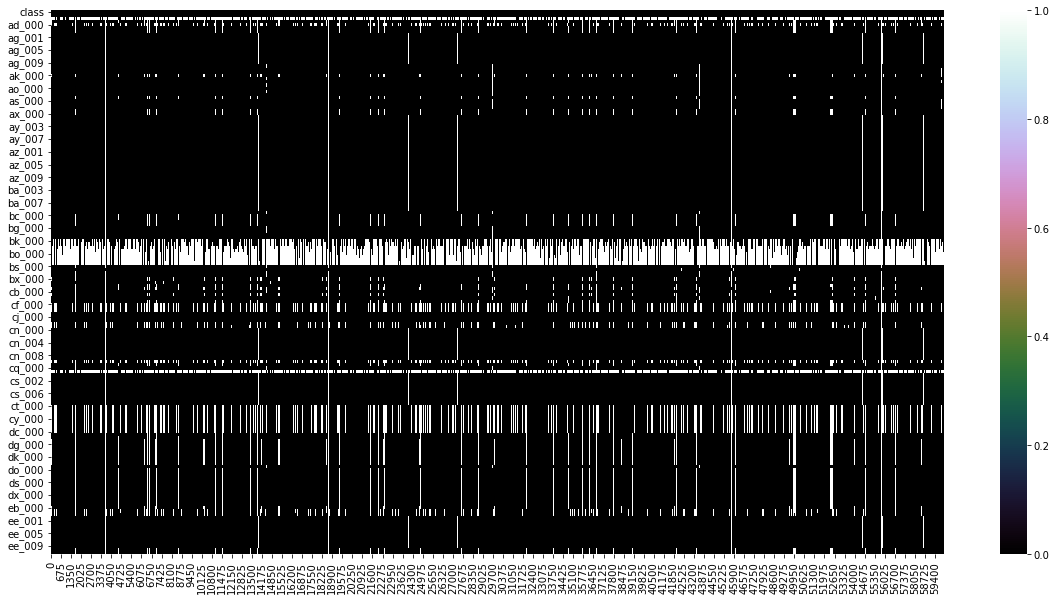

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.isna().transpose(),
           cmap="cubehelix")

In [12]:
percent_missing = train_df.isna().sum() * 100 / len(train_df)

In [13]:
percent_missing = percent_missing.to_frame().sort_values(by=0,ascending=True)

In [14]:
percent_missing

,0
class,0.000000
aa_000,0.000000
bt_000,0.278333
ck_000,0.563333
cj_000,0.563333
...,...
cr_000,77.215000
bo_000,77.221667
bp_000,79.566667
bq_000,81.203333


In [15]:
Total_missing_value = train_df.isna().sum().sum()

In [16]:
print(Total_missing_value)

850015


## The number of total missing value in the dataset is 850015

In [17]:
train_df.iloc[:,1:]=train_df.iloc[:,1:].apply(pd.to_numeric)

In [18]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,60000.0,5.933650e+04,1.454301e+05,0.0,834.0,30776.0,48668.0,2.746564e+06
ab_000,13671.0,7.131885e-01,3.478962e+00,0.0,0.0,0.0,0.0,2.040000e+02
ac_000,56665.0,3.560143e+08,7.948749e+08,0.0,16.0,152.0,964.0,2.130707e+09
ad_000,45139.0,1.906206e+05,4.040441e+07,0.0,24.0,126.0,430.0,8.584298e+09
ae_000,57500.0,6.819130e+00,1.615434e+02,0.0,0.0,0.0,0.0,2.105000e+04
...,...,...,...,...,...,...,...,...
ee_007,59329.0,3.462714e+05,1.728056e+06,0.0,110.0,41098.0,167814.0,1.195801e+08
ee_008,59329.0,1.387300e+05,4.495100e+05,0.0,0.0,3812.0,139724.0,1.926740e+07
ee_009,59329.0,8.388915e+03,4.747043e+04,0.0,0.0,0.0,2028.0,3.810078e+06
ef_000,57276.0,9.057895e-02,4.368855e+00,0.0,0.0,0.0,0.0,4.820000e+02


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


### Removing all columns which have more than 20% NaN value

In [20]:
col_missing=percent_missing[percent_missing[0]>20]

In [21]:
print(col_missing)

                0
dc_000  23.013333
db_000  23.013333
da_000  23.013333
cz_000  23.013333
cy_000  23.013333
cu_000  23.013333
cv_000  23.013333
ct_000  23.013333
cx_000  23.013333
ad_000  24.768333
ch_000  24.768333
cg_000  24.768333
co_000  24.768333
cf_000  24.768333
bk_000  38.390000
bl_000  45.461667
bm_000  65.915000
bn_000  73.348333
ab_000  77.215000
cr_000  77.215000
bo_000  77.221667
bp_000  79.566667
bq_000  81.203333
br_000  82.106667


In [22]:
drop_col=list(col_missing.index)

In [23]:
drop_col

['dc_000',
 'db_000',
 'da_000',
 'cz_000',
 'cy_000',
 'cu_000',
 'cv_000',
 'ct_000',
 'cx_000',
 'ad_000',
 'ch_000',
 'cg_000',
 'co_000',
 'cf_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'ab_000',
 'cr_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000']

In [24]:
train_df=train_df.drop(drop_col,axis=1)

In [25]:
train_df.shape

(60000, 147)

In [26]:
train_df.fillna(train_df.median(),inplace=True)

<AxesSubplot:>

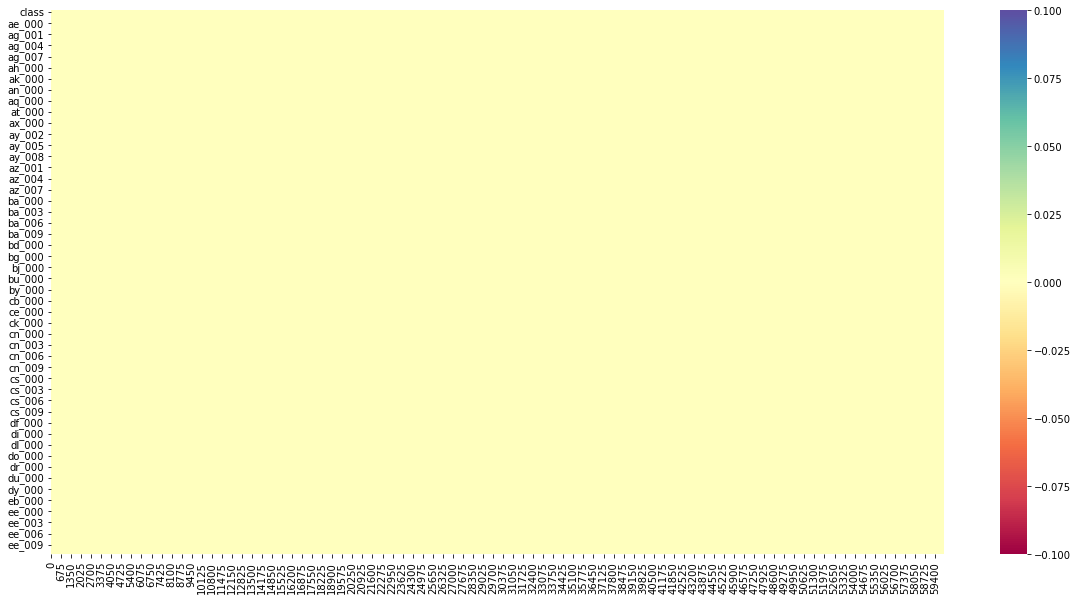

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.isna().transpose(),
           cmap="Spectral")

### Chceking the target Variable 

Text(0.5, 1.0, 'Ratio of the class feature')

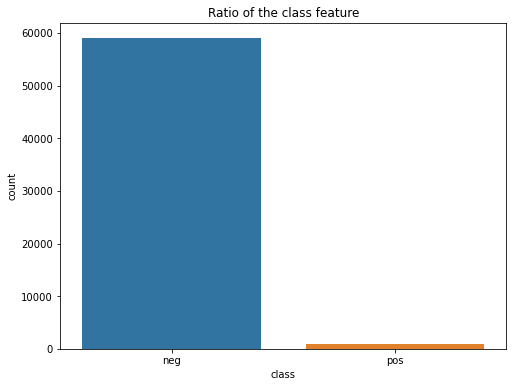

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x=train_df["class"])
plt.title("Ratio of the class feature")

### Feature Encoding

In [29]:
from sklearn import preprocessing

In [30]:
le=preprocessing.LabelEncoder()

In [31]:
train_df['class'] = le.fit_transform(train_df['class'])

Text(0.5, 1.0, 'Ratio of the class feature')

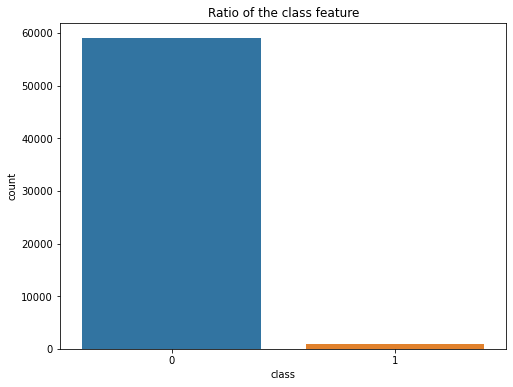

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x=train_df["class"])
plt.title("Ratio of the class feature")

In [33]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import svm

### Split the Dataset

In [34]:
X = train_df.drop(['class'], axis=1)
y = train_df['class']

In [35]:
X.shape

(60000, 146)

In [36]:
y.shape

(60000,)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
X_train.shape

(42000, 146)

In [39]:
X_test.shape

(18000, 146)

In [40]:
y_train.shape

(42000,)

In [41]:
y_test.shape

(18000,)

In [42]:
os=RandomOverSampler(0.75)

In [43]:
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

In [44]:
from collections import Counter

In [45]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 41302, 1: 698})
The number of classes after fit Counter({0: 41302, 1: 30976})


In [46]:
X_train_os_copy=X_train_os
y_train_os_copy=y_train_os

In [47]:
X_train_os

,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,34244,244.0,0.0,0.0,0.0,0.0,0.0,325082.0,864480.0,569786.0,...,178556.0,73312.0,213774.0,137102.0,602034.0,295186.0,390.0,0.0,0.0,0.0
1,850,92.0,0.0,0.0,0.0,0.0,0.0,3106.0,62516.0,7468.0,...,5036.0,2894.0,8128.0,10284.0,8914.0,2990.0,140.0,0.0,0.0,0.0
2,1424,20.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,54176.0,...,2604.0,962.0,2946.0,56854.0,8.0,0.0,0.0,0.0,0.0,0.0
3,8,6.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,694.0,...,158.0,62.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62,8.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,18734.0,...,678.0,168.0,400.0,602.0,226.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72273,1089044,152.0,0.0,0.0,0.0,14940.0,376334.0,8965652.0,30294094.0,28127260.0,...,9999794.0,4057552.0,9160900.0,14983716.0,11027566.0,1004492.0,16734.0,0.0,0.0,0.0
72274,934982,970.0,0.0,0.0,0.0,0.0,0.0,0.0,1431852.0,43294646.0,...,13905996.0,7259792.0,20149172.0,250760.0,32376.0,12404.0,8070.0,790.0,0.0,0.0
72275,94322,728.0,0.0,0.0,0.0,0.0,1060.0,76534.0,265378.0,4133494.0,...,1287354.0,610274.0,1045054.0,688370.0,387756.0,126258.0,91474.0,2770.0,0.0,0.0
72276,1537494,152.0,0.0,0.0,0.0,0.0,0.0,206.0,582054.0,14369496.0,...,11974798.0,6087874.0,12277828.0,11761894.0,10444364.0,6302848.0,8147022.0,727152.0,0.0,0.0


In [48]:
scale=StandardScaler()

In [49]:
X_train_os_copy=pd.DataFrame(scale.fit_transform(X_train_os_copy),columns=X_train_os.columns)

In [50]:
X_test=pd.DataFrame(scale.transform(X_test),columns=X_test.columns)

## LogisticRegression

In [51]:
lr=LogisticRegression()

In [52]:
lr.fit(X_train_os_copy,y_train_os_copy)

LogisticRegression()

In [53]:
lr.score(X_train_os_copy,y_train_os_copy)

0.9677218517391184

In [54]:
lr_pred=lr.predict(X_test)

In [55]:
print(accuracy_score(y_test,lr_pred))

0.9752777777777778


In [56]:
print(confusion_matrix(y_test,lr_pred))

[[17285   413]
 [   32   270]]


In [57]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17698
           1       0.40      0.89      0.55       302

    accuracy                           0.98     18000
   macro avg       0.70      0.94      0.77     18000
weighted avg       0.99      0.98      0.98     18000



## SVM

In [58]:
sv = svm.SVC()

In [59]:
sv.fit(X_train_os_copy,y_train_os_copy)

SVC()

In [60]:
sv.score(X_train_os_copy,y_train_os_copy)

0.9796895320844518

In [61]:
sv_pred = sv.predict(X_test)

In [62]:
print(accuracy_score(y_test,sv_pred))

0.9830555555555556


In [63]:
print(confusion_matrix(y_test,sv_pred))

[[17455   243]
 [   62   240]]


In [64]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17698
           1       0.50      0.79      0.61       302

    accuracy                           0.98     18000
   macro avg       0.75      0.89      0.80     18000
weighted avg       0.99      0.98      0.98     18000



In [65]:
print(roc_auc_score(y_test,sv_pred))

0.8904858108709856


In [66]:
#sv_grid_param = {
    #"C" : [0.1,1,2,5,10,100],
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #'gamma':['scale', 'auto']
#}

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [68]:
#grid_search_svm=GridSearchCV(estimator=sv,param_grid=sv_grid_param,cv=3,verbose=1)

In [69]:
#grid_search_svm.fit(X_train_os_copy,y_train_os_copy)

## DecisionTreeClassifier

In [70]:
dc=DecisionTreeClassifier()

In [71]:
dc.fit(X_train_os,y_train_os)

DecisionTreeClassifier()

In [72]:
dc.score(X_train_os,y_train_os)

1.0

In [73]:
dc_pred = dc.predict(X_test)

In [74]:
print(accuracy_score(y_test,dc_pred))

0.9832222222222222


In [75]:
print(roc_auc_score(y_test,dc_pred))

0.5


In [76]:
dc_grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [77]:
dc_randomcv=RandomizedSearchCV(estimator=dc,param_distributions=dc_grid_param ,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [78]:
dc_randomcv.fit(X_train_os,y_train_os)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 10),
                                        'min_samples_leaf': range(1, 8),
                                        'min_samples_split': range(2, 8),
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [79]:
dc_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 9,
 'criterion': 'entropy'}

In [80]:
dc_model_with_best_parm=DecisionTreeClassifier(criterion='entropy',
 max_depth= 9,
 min_samples_leaf=1,
 min_samples_split= 7,
 splitter= 'best')

In [81]:
dc_model_with_best_parm.fit(X_train_os,y_train_os)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=7)

In [82]:
pred_dc_model_with_best_parm=dc_model_with_best_parm.predict(X_test)

In [83]:
print(accuracy_score(y_test,pred_dc_model_with_best_parm))

0.9832222222222222


In [84]:
print(classification_report(y_test,pred_dc_model_with_best_parm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17698
           1       0.00      0.00      0.00       302

    accuracy                           0.98     18000
   macro avg       0.49      0.50      0.50     18000
weighted avg       0.97      0.98      0.97     18000



In [85]:
print(roc_auc_score(y_test,pred_dc_model_with_best_parm))

0.5


## RandomForestClassifier

In [86]:
rf= RandomForestClassifier()

In [87]:
rf.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [88]:
rf_pred=rf.predict(X_test)

In [89]:
print(accuracy_score(y_test,rf_pred))

0.9832222222222222


In [90]:
print(roc_auc_score(y_test,rf_pred))

0.5


In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
import optuna

In [93]:
def objective(trial):
        rf_params = {
            'n_estimators': trial.suggest_int('n_estimators', 80,400,20),
            'max_depth': trial.suggest_int('max_depth', 4, 25),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 25),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 40),
        }
        optuna_rf = RandomForestClassifier(random_state=42, **rf_params)
        return cross_val_score(optuna_rf,X_train_os,y_train_os, n_jobs=-1, cv=3).mean()

In [94]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-11-27 19:58:26,204] A new study created in memory with name: no-name-bda4ff85-0165-4b42-8f6c-b77bcff08445
[I 2022-11-27 20:00:47,440] Trial 0 finished with value: 0.9868424572897608 and parameters: {'n_estimators': 320, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 31}. Best is trial 0 with value: 0.9868424572897608.
[I 2022-11-27 20:02:05,921] Trial 1 finished with value: 0.9905503667063994 and parameters: {'n_estimators': 180, 'max_depth': 16, 'min_samples_split': 13, 'min_samples_leaf': 16}. Best is trial 1 with value: 0.9905503667063994.
[I 2022-11-27 20:03:30,140] Trial 2 finished with value: 0.9887240768097744 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 21}. Best is trial 1 with value: 0.9905503667063994.
[I 2022-11-27 20:04:49,133] Trial 3 finished with value: 0.9885303840776546 and parameters: {'n_estimators': 200, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 11}. Best is trial 1 with 

Accuracy: 0.9971775580860721
Best hyperparameters: {'n_estimators': 100, 'max_depth': 24, 'min_samples_split': 19, 'min_samples_leaf': 2}


In [95]:
study.best_params

{'n_estimators': 100,
 'max_depth': 24,
 'min_samples_split': 19,
 'min_samples_leaf': 2}

In [96]:
rf_best=RandomForestClassifier(n_estimators=320,max_depth=20,min_samples_split=19,min_samples_leaf= 3)
rf_best.fit(X_train_os,y_train_os)

RandomForestClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=19,
                       n_estimators=320)

In [97]:
re_pred_best = rf_best.predict(X_test)

In [98]:
print(accuracy_score(y_test,re_pred_best))

0.9832222222222222


In [99]:
print(classification_report(y_test,re_pred_best))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17698
           1       0.00      0.00      0.00       302

    accuracy                           0.98     18000
   macro avg       0.49      0.50      0.50     18000
weighted avg       0.97      0.98      0.97     18000



## AdaBoostClassifier

In [100]:
ad=AdaBoostClassifier()

In [101]:
ad.fit(X_train_os,y_train_os)

AdaBoostClassifier()

In [102]:
ad.score(X_train_os,y_train_os)

0.9668917236226791

In [103]:
ad_pred=ad.predict(X_test)

In [104]:
print(accuracy_score(y_test,ad_pred))

0.9832222222222222


In [105]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17698
           1       0.00      0.00      0.00       302

    accuracy                           0.98     18000
   macro avg       0.49      0.50      0.50     18000
weighted avg       0.97      0.98      0.97     18000



In [106]:
grid_param_ad = {
    'n_estimators':range(50,100,10),
    'learning_rate':[0.01,1.0,2.0,5.0,10.0,100.0],
    'algorithm':['SAMME','SAMME.R']
    
}

In [107]:
#grid_search_ad=GridSearchCV(estimator=ad,param_grid=grid_param_ad,cv=3,verbose=1)

In [108]:
#grid_search_ad.fit(X_train_os,y_train_os)

In [109]:
#dc_randomcv=RandomizedSearchCV(estimator=ad,param_distributions=grid_param_ad ,n_iter=100,cv=3,verbose=2,
                               #random_state=100,n_jobs=-1)

## GradientBoostingClassifier

In [110]:
gb=GradientBoostingClassifier()

In [111]:
gb.fit(X_train_os,y_train_os)

GradientBoostingClassifier()

In [112]:
gb_pred=gb.predict(X_test)

In [113]:
print(gb.score(X_train_os,y_train_os))

0.9834942859514652


In [114]:
print(accuracy_score(y_test,gb_pred))

0.9832222222222222


In [115]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17698
           1       0.00      0.00      0.00       302

    accuracy                           0.98     18000
   macro avg       0.49      0.50      0.50     18000
weighted avg       0.97      0.98      0.97     18000



In [116]:
model_xgb=xgb.XGBClassifier()

In [117]:
SM_os=SMOTETomek(0.7)

In [118]:
X_train_sm,y_train_sm=SM_os.fit_resample(X_train,y_train)

In [119]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0: 41302, 1: 698})
The number of classes after fit Counter({0: 41297, 1: 28906})


## XGBClassifier

In [120]:
model_xgb=xgb.XGBClassifier()

In [121]:
model_xgb.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [122]:
xgb_pred=model_xgb.predict(X_test)

In [123]:
print(accuracy_score(y_test,xgb_pred))

0.9832222222222222


In [124]:
print(roc_auc_score(y_test,xgb_pred))

0.5
